In [21]:

#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [30]:
data=pd.read_csv('/Users/poojithareddy/Library/Containers/com.microsoft.Excel/Data/Downloads/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,25793,0.820732,-0.463287,1.211246,1.411977,-1.055161,0.036254,-0.403357,0.131203,0.679141,...,0.132675,0.252172,-0.064301,0.408930,0.229649,-0.406441,0.060799,0.064289,151.21,0
15009,25796,-0.609843,0.938376,0.998766,1.006463,0.886470,-0.509467,1.204209,-0.473085,-0.740993,...,0.098262,0.633752,-0.010371,0.112659,-0.059210,-0.247364,-0.219347,-0.101754,7.50,0
15010,25799,1.400253,-1.097515,0.792487,-1.452769,-1.587838,-0.240834,-1.266878,0.108509,-1.985971,...,-0.278106,-0.463843,0.223695,0.172924,-0.005743,-0.410135,0.054450,0.018071,14.00,0
15011,25799,-5.876487,3.720073,1.162030,-0.612066,-1.849709,1.474395,-0.053961,-0.038507,4.625806,...,-1.422344,-0.423848,-0.130920,-0.032077,1.379243,-0.067990,2.279755,1.024241,50.00,0


In [31]:
print(data.head)


<bound method NDFrame.head of         Time        V1        V2        V3        V4        V5        V6  \
0        406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1        472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2       4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3       6986 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4       7519  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...      ...       ...       ...       ...       ...       ...       ...   
15008  25793  0.820732 -0.463287  1.211246  1.411977 -1.055161  0.036254   
15009  25796 -0.609843  0.938376  0.998766  1.006463  0.886470 -0.509467   
15010  25799  1.400253 -1.097515  0.792487 -1.452769 -1.587838 -0.240834   
15011  25799 -5.876487  3.720073  1.162030 -0.612066 -1.849709  1.474395   
15012  25801 -0.437710 -0.760615  2.243478 -2.064048 -0.808198 -0.519136   

             V7        V8        V9  ...       V21       

In [32]:
print(data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [33]:
data.shape


(15013, 31)

In [34]:
print(data.describe)


<bound method NDFrame.describe of         Time        V1        V2        V3        V4        V5        V6  \
0        406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1        472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2       4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3       6986 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4       7519  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...      ...       ...       ...       ...       ...       ...       ...   
15008  25793  0.820732 -0.463287  1.211246  1.411977 -1.055161  0.036254   
15009  25796 -0.609843  0.938376  0.998766  1.006463  0.886470 -0.509467   
15010  25799  1.400253 -1.097515  0.792487 -1.452769 -1.587838 -0.240834   
15011  25799 -5.876487  3.720073  1.162030 -0.612066 -1.849709  1.474395   
15012  25801 -0.437710 -0.760615  2.243478 -2.064048 -0.808198 -0.519136   

             V7        V8        V9  ...       V21   

In [35]:
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(3003, 31)


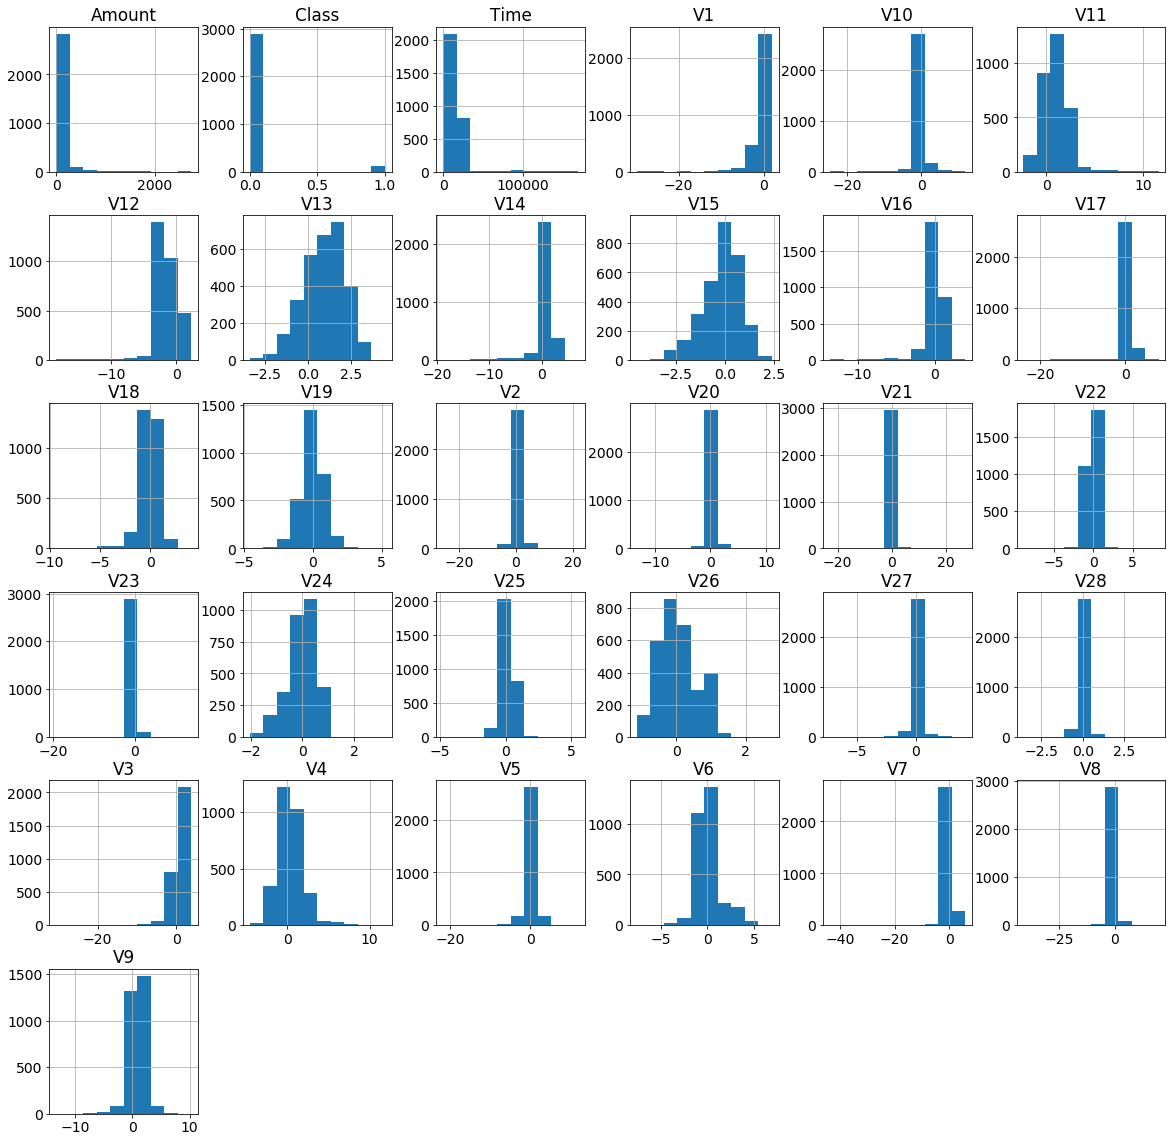

In [36]:
data.hist(figsize = (20, 20))
plt.show()

In [37]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0369475138121547
Fraud Cases: 107
Valid Cases: 2896


In [38]:
fraud.Amount.describe() 

count     107.000000
mean      140.257664
std       262.557187
min         0.000000
25%         1.000000
50%        22.470000
75%       126.220000
max      1354.250000
Name: Amount, dtype: float64

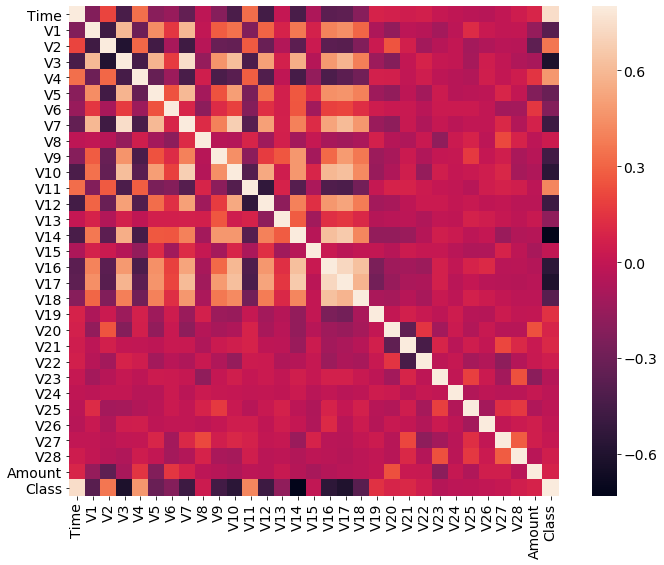

In [39]:
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [40]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

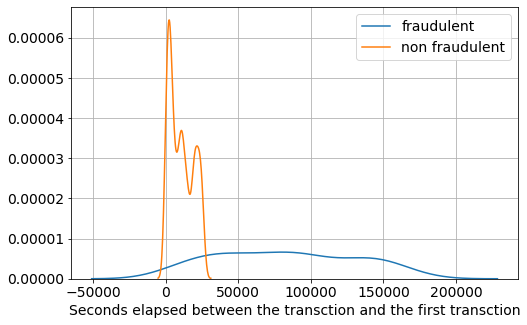

In [41]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [42]:
#Analysis
#We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [43]:
# Dropping the Time column
data.drop('Time', axis=1, inplace=True)

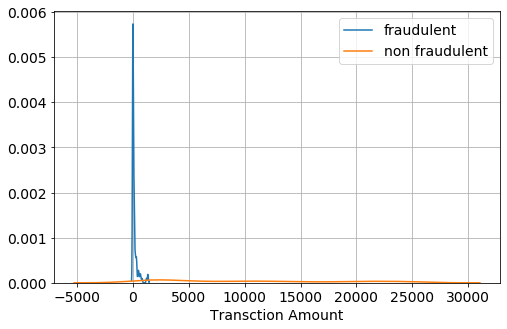

In [44]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

In [45]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [47]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [49]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9840213049267643


In [50]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

F1 score of the Decision Tree model is 0.7391304347826089


In [51]:
confusion_matrix(y_test, dt_yhat, labels = [0, 1])

array([[722,   4],
       [  8,  17]])

In [52]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [53]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))


Accuracy score of the K-Nearest Neighbors model is 0.9760319573901465


In [54]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the K-Nearest Neighbors model is 0.47058823529411764


In [55]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [56]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9880159786950732


In [57]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.8235294117647058


In [58]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [59]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9933422103861518


In [60]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))


F1 score of the Random Forest model is 0.888888888888889
